In [36]:
import pandas as pd
import numpy as np
import scipy.integrate
import scipy.special
from scipy.special import inv_boxcox
from scipy import stats
import seaborn as sns
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [37]:
finaldataset_ind = pd.read_csv("../Downloads/finaldataset_ind.csv")
finaldataset_val = pd.read_csv("../Downloads/finaldataset_val.csv")

In [38]:
finaldataset_ind.drop(['Unnamed: 0'], axis=1, inplace=True)
finaldataset_val.drop(['Unnamed: 0'], axis=1, inplace=True)

In [39]:
finaldataset_ind.shape

(18917, 103)

In [40]:
finaldataset_val.shape

(18917, 105)

__change features to categorical__

In [41]:
category_columns = ['sex', 'income', 'entrepreneur_freelancer', 
                     'entrepreneur_freelancer_alongside', 'one_person_business', 'income', 
                     'company_owner', 'partnership', 'partner_partnership', 
                     'private_limited_liability_company', 'other', 'none_work_situation', 
                     'early_retirement', 'zorgtoeslag', 'Ziektewetuitkering', 
                     'ANW', 'nabestaandenpensioen', 'orphan_pension', 'bijstand', 
                     'bijstand_zelfstandigen', 'IOAWIOAZ', 'WGA', 'invadility_pension', 
                     'kinderbijslag', 'none_benefit', 'income_realestate', 'student_grant', 
                     'student_loan', 'alimony_ex', 'alimony_children', 'study_allowance_parents', 
                     'allowence_family', 'dividend_stock_investment', 'interests', 
                     'none_sources', 'interest_loans', 'alimony_ex_paid', 'alimony_children_paid',
                     'parental_support_paid', 'parental_support_paid_other', 'support_gift_paid', 
                     'big_purchase', 'no_arrears', 'rent_mortgage_arrears',  
                     'general_utilities_arrear', 'other_arrears', 'months_arrears_rent', 
                     'months_arrears_general_utilities', 'partyvote', 'age_2', 'satisfaction_individual_2', 
                     'satisfaction_national_2', 'income_2', 
                     'gross_wages_amount_2', 'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'realestate_amount_2', 'student_grant_2', 
                     'amount_student_grant_2', 'student_loan_2', 'amount_student_loan_2', 'alimony_ex_2', 
                     'amount_alimony_ex_2', 
                     'alimony_children_2', 'amount_alimony_children_2', 'study_allowance_parents_2', 
                     'amount_study_allowance_parents_2', 
                     'allowence_family_2', 'amount_allowance_family_2', 'dividend_stock_investment_2', 
                     'amount_dividend_stock_investment_2',
                     'interests_2', 'amount_interests_2', 
                     'none_sources_2', 'interest_loans_2', 'amount_interest_loans_2', 'parental_support_paid_other_2', 
                     'support_gift_paid_2', 'amount_support_gift_paid_2',
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'amount_rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'amount_general_utilities_arrear_2',  
                     'other_arrears_2', 'amount_other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

__category__

In [43]:
for col in finaldataset_ind.columns:
    for i in category_columns:
        if col == i:
            finaldataset_ind[col] = finaldataset_ind[col].astype('category')

In [44]:
for col in finaldataset_val.columns:
    for i in category_columns:
        if col == i:
            finaldataset_val[col] = finaldataset_val[col].astype('category')

In [46]:
finaldataset_ind.dtypes

date                                   float64
sex                                   category
age                                    float64
age_2                                 category
satisfaction_individual                  int64
                                        ...   
months_arrears_rent                   category
months_arrears_rent_2                 category
months_arrears_general_utilities      category
months_arrears_general_utilities_2    category
partyvote                             category
Length: 103, dtype: object

# Split into train and test set (individual)

In [47]:
test_set_ind = finaldataset_ind.loc[finaldataset_ind.date > 202105, :].copy()
train_set_ind = finaldataset_ind.loc[finaldataset_ind.date < 202105, :].copy()
test_set_val = finaldataset_val.loc[finaldataset_val.date > 202105, :].copy()
train_set_val = finaldataset_val.loc[finaldataset_val.date < 202105, :].copy()

In [48]:
print(train_set_ind.shape)
print(test_set_ind.shape)
print(train_set_val.shape)
print(test_set_val.shape)

(15200, 103)
(3717, 103)
(15200, 105)
(3717, 105)


In [49]:
train_set_ind['partyvote'].value_counts()

VVD      3068
PvdA     2791
CDA      2361
SP       1873
PVV      1279
D66      1221
GL        979
CU        584
other     418
PvdD      300
SGP       266
blank      60
Name: partyvote, dtype: int64

<AxesSubplot:>

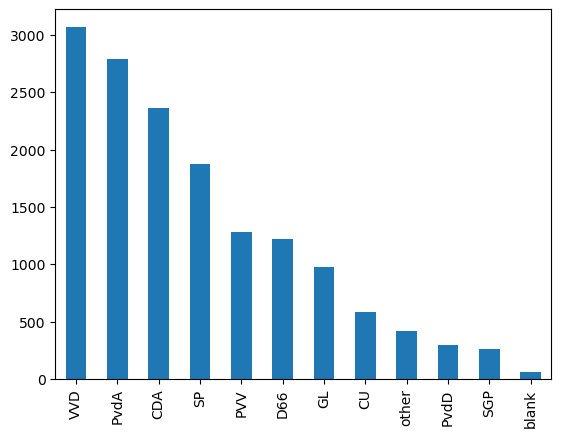

In [50]:
train_set_ind.partyvote.value_counts().plot.bar()

In [51]:
test_set_ind['partyvote'].value_counts()

VVD      781
D66      582
other    487
CDA      379
PvdA     327
PVV      301
SP       260
GL       219
PvdD     172
CU       140
SGP       56
blank     13
Name: partyvote, dtype: int64

<AxesSubplot:>

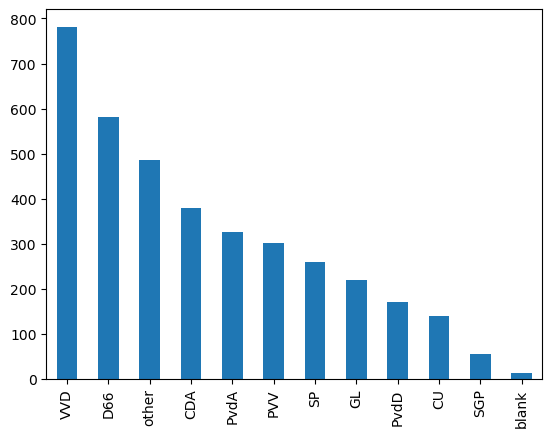

In [52]:
test_set_ind.partyvote.value_counts().plot.bar()

__calculate percentages of train and test split__

In [53]:
print(len(train_set_ind.index)/len(finaldataset_ind.index)*100)
print(len(test_set_ind.index)/len(finaldataset_ind.index)*100)

80.35100703071312
19.648992969286887


In [54]:
print(len(train_set_val.index)/len(finaldataset_val.index)*100)
print(len(test_set_val.index)/len(finaldataset_val.index)*100)

80.35100703071312
19.648992969286887


&nbsp;


&nbsp;

# Box-Cox continuous non-normal variables

C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


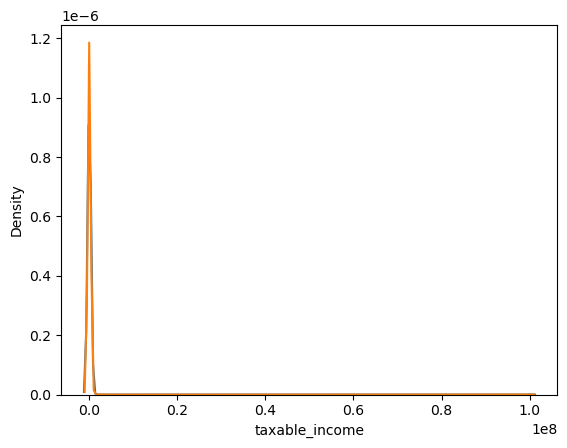

In [55]:
print(sns.distplot(train_set_ind['taxable_income'], hist=False, kde=True)) 
print(sns.distplot(train_set_val['taxable_income'], hist=False, kde=True)) 

In [56]:
train_set_ind['taxable_income'].nlargest(n=20)

6132     100000000.0
15308    100000000.0
4920      99999999.0
5323      99999999.0
5521      99999999.0
7679      99999999.0
8206      99999999.0
10717     99999999.0
12394     99999999.0
17702     99999999.0
18408     99999999.0
13010      2358300.0
7347       1781300.0
6041       1317300.0
9379       1317300.0
12680      1317300.0
12743      1317300.0
11607      1204200.0
5074       1034300.0
6137       1034300.0
Name: taxable_income, dtype: float64

In [57]:
test_set_ind['taxable_income'].nlargest(n=20)

2460    99999999.0
1329     2008000.0
3190      600000.0
290       550000.0
3523      541000.0
2125      485667.0
403       325000.0
1527      316704.0
1757      300070.0
3630      300070.0
818       265058.0
1207      262000.0
12        250000.0
2468      250000.0
2536      250000.0
2721      250000.0
3697      250000.0
719       241917.0
1385      240000.0
2853      240000.0
Name: taxable_income, dtype: float64

C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


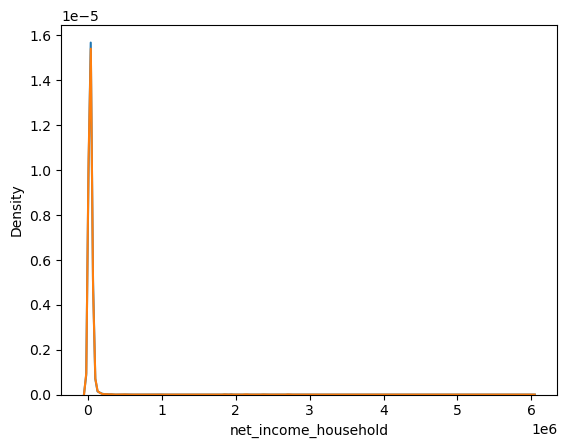

In [58]:
print(sns.distplot(train_set_ind['net_income_household'], hist=False, kde=True)) 
print(sns.distplot(train_set_val['net_income_household'], hist=False, kde=True)) 

In [59]:
train_set_ind['net_income_household'].nlargest(n=20)

7080     6000000.0
16992    3052816.0
7679     2709400.0
8857     2709400.0
11607    2709400.0
12680    2709400.0
8235     2375150.0
13010    2375150.0
15043    2375150.0
15245    2375150.0
12743    2140600.0
13080    2137065.0
15596    2137065.0
3844     1936260.0
4416     1936260.0
6729     1936260.0
9379     1936260.0
10717    1936260.0
11699    1936260.0
12394    1936260.0
Name: net_income_household, dtype: float64

In [60]:
test_set_ind['net_income_household'].nlargest(n=20)

2460    1936260.0
3299     980000.0
1395     500000.0
1819     333769.0
2608     294684.0
997      265000.0
3339     265000.0
555      264000.0
1329     250000.0
3396     250000.0
227      233000.0
253      232135.0
3565     200000.0
710      196537.0
1511     190000.0
1678     180000.0
1757     180000.0
3419     180000.0
3064     165000.0
1207     160000.0
Name: net_income_household, dtype: float64

__have to add constant to the value, because box-cox does not handle negative values__

In [61]:
min_train_tax_ind = min(train_set_ind['taxable_income'])
min_test_tax_ind = min(test_set_ind['taxable_income'])

min_train_house_ind = min(train_set_ind['net_income_household'])
min_test_house_ind = min(test_set_ind['net_income_household'])

In [62]:
min_train_tax_val = min(train_set_val['taxable_income'])
min_test_tax_val = min(test_set_val['taxable_income'])

min_train_house_val = min(train_set_val['net_income_household'])
min_test_house_val = min(test_set_val['net_income_household'])

In [63]:
train_set_ind['taxable_income'] = train_set_ind['taxable_income'] - min_train_tax_ind + 1 
test_set_ind['taxable_income'] = test_set_ind['taxable_income'] - min_test_tax_ind + 1

train_set_ind['net_income_household'] = train_set_ind['net_income_household'] - min_train_house_ind + 1 
test_set_ind['net_income_household'] = test_set_ind['net_income_household'] - min_test_house_ind + 1

In [64]:
train_set_val['taxable_income'] = train_set_val['taxable_income'] - min_train_tax_val + 1 
test_set_val['taxable_income'] = test_set_val['taxable_income'] - min_test_tax_val + 1

train_set_val['net_income_household'] = train_set_val['net_income_household'] - min_train_house_val + 1 
test_set_val['net_income_household'] = test_set_val['net_income_household'] - min_test_house_val + 1

In [65]:
fitted_data_train2_ind, fitted_lambda_train2_ind = stats.boxcox(train_set_ind['taxable_income'])
fitted_data_test2_ind, fitted_lambda_test2_ind = stats.boxcox(test_set_ind['taxable_income'])

fitted_data_train3_ind, fitted_lambda_train3_ind = stats.boxcox(train_set_ind['net_income_household'])
fitted_data_test3_ind, fitted_lambda_test3_ind = stats.boxcox(test_set_ind['net_income_household'])

In [66]:
fitted_data_train2_val, fitted_lambda_train2_val = stats.boxcox(train_set_val['taxable_income'])
fitted_data_test2_val, fitted_lambda_test2_val = stats.boxcox(test_set_val['taxable_income'])

fitted_data_train3_val, fitted_lambda_train3_val = stats.boxcox(train_set_val['net_income_household'])
fitted_data_test3_val, fitted_lambda_test3_val = stats.boxcox(test_set_val['net_income_household'])

__Lambda value (power to which data raised)__

In [67]:
print(f"Lambda value used for Transformation train(taxable_income individual): {fitted_lambda_train2_ind}")
print(f"Lambda value used for Transformation test(taxable_income individual): {fitted_lambda_test2_ind}")

print(f"Lambda value used for Transformation train(net_income_household individual): {fitted_lambda_train3_ind}")
print(f"Lambda value used for Transformation test(net_income_household individual): {fitted_lambda_test3_ind}")

Lambda value used for Transformation train(taxable_income individual): -0.0033908463992051003
Lambda value used for Transformation test(taxable_income individual): 0.03971085829482462
Lambda value used for Transformation train(net_income_household individual): 0.06002850452231695
Lambda value used for Transformation test(net_income_household individual): 0.2010739969437639


In [68]:
print(f"Lambda value used for Transformation train(taxable_income valence): {fitted_lambda_train2_val}")
print(f"Lambda value used for Transformation test(taxable_income valence): {fitted_lambda_test2_val}")

print(f"Lambda value used for Transformation train(net_income_household valence): {fitted_lambda_train3_val}")
print(f"Lambda value used for Transformation test(net_income_household valence): {fitted_lambda_test3_val}")

Lambda value used for Transformation train(taxable_income valence): -0.058498642802253524
Lambda value used for Transformation test(taxable_income valence): 0.040797955740619805
Lambda value used for Transformation train(net_income_household valence): 0.08153411792677799
Lambda value used for Transformation test(net_income_household valence): 0.3458587776029604


__apply to variables__

In [69]:
train_set_ind['taxable_income'] = scipy.special.inv_boxcox(train_set_ind['taxable_income'], fitted_data_train2_ind)
test_set_ind['taxable_income'] = scipy.special.inv_boxcox(test_set_ind['taxable_income'], fitted_data_test2_ind)
train_set_ind['net_income_household'] = scipy.special.inv_boxcox(train_set_ind['net_income_household'], fitted_data_train3_ind)
test_set_ind['net_income_household'] = scipy.special.inv_boxcox(test_set_ind['net_income_household'], fitted_data_test3_ind)

In [70]:
train_set_val['taxable_income'] = scipy.special.inv_boxcox(train_set_val['taxable_income'], fitted_data_train2_val)
test_set_val['taxable_income'] = scipy.special.inv_boxcox(test_set_val['taxable_income'], fitted_data_test2_val)
train_set_val['net_income_household'] = scipy.special.inv_boxcox(train_set_val['net_income_household'], fitted_data_train3_val)
test_set_val['net_income_household'] = scipy.special.inv_boxcox(test_set_val['net_income_household'], fitted_data_test3_val)

C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxable_income', ylabel='Density'>

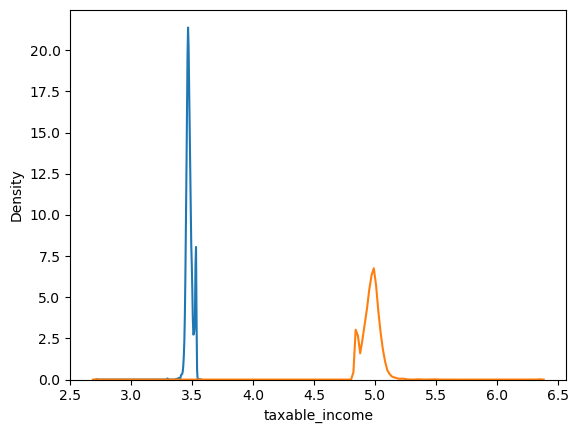

In [71]:
sns.distplot(train_set_ind['taxable_income'], hist=False, kde=True) 
sns.distplot(train_set_val['taxable_income'], hist=False, kde=True) 

C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='net_income_household', ylabel='Density'>

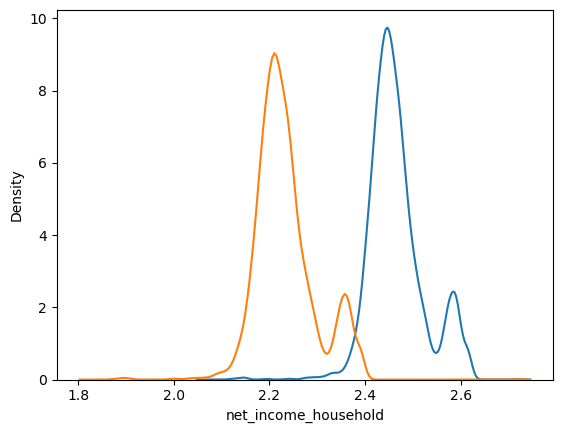

In [72]:
sns.distplot(train_set_ind['net_income_household'], hist=False, kde=True) 
sns.distplot(train_set_val['net_income_household'], hist=False, kde=True) 

&nbsp;

&nbsp;

# minmax scale continuous variables

In [73]:
scaler = MinMaxScaler()

In [74]:
train_set_ind[['taxable_income','net_income_household']] = scaler.fit_transform(train_set_ind[['taxable_income','net_income_household']])
test_set_ind[['taxable_income','net_income_household']] = scaler.fit_transform(test_set_ind[['taxable_income','net_income_household']])
train_set_val[['taxable_income','net_income_household', 'GDP', 'unemployment', 'inflation']] = scaler.fit_transform(train_set_val[['taxable_income','net_income_household', 'GDP', 'unemployment', 'inflation']])
test_set_val[['taxable_income','net_income_household', 'GDP', 'unemployment', 'inflation']] = scaler.fit_transform(test_set_val[['taxable_income','net_income_household', 'GDP', 'unemployment', 'inflation']])

In [75]:
print(min(train_set_val['taxable_income']))
print(min(train_set_val['net_income_household']))
print(min(train_set_val['GDP']))
print(min(train_set_val['unemployment']))
print(min(train_set_val['inflation']))

0.0
0.0
0.0
0.0
0.0


In [76]:
print(max(train_set_val['taxable_income']))
print(max(train_set_val['net_income_household']))
print(max(train_set_val['GDP']))
print(max(train_set_val['unemployment']))
print(max(train_set_val['inflation']))

1.0
1.0
1.0
1.0
1.0


&nbsp;

# Create dataframes with progressively dropped respondents with invalid answers

In [77]:
duplicate_columns = ['satisfaction_individual_2', 'satisfaction_national_2', 'income_2', 
                     'entrepreneur_freelancer_2', 
                     'entrepreneur_freelancer_alongside_2', 'one_person_business_2', 
                     'company_owner_2', 'partnership_2', 'partner_partnership_2', 
                     'private_limited_liability_company_2', 'other_2', 'none_work_situation_2', 
                     'zorgtoeslag_2', 'Ziektewetuitkering_2', 
                     'ANW_2', 'nabestaandenpensioen_2', 'bijstand_2', 
                     'bijstand_zelfstandigen_2', 'IOAWIOAZ_2', 'WGA_2', 'invadility_pension_2', 
                     'kinderbijslag_2', 'none_benefit_2', 'income_realestate_2', 'student_grant_2', 
                     'student_loan_2', 'alimony_ex_2',  
                     'alimony_children_2', 'study_allowance_parents_2', 
                     'allowence_family_2', 'dividend_stock_investment_2', 
                     'interests_2', 
                     'none_sources_2', 'interest_loans_2',  
                     'support_gift_paid_2', 
                     'taxable_income_2', 'net_income_household_2', 'financial_situation_grade_2', 
                     'difficulty_life_grade_2', 'financial_situation_category_2', 'household_expenditure_2', 
                     'big_purchase_2', 'financial_situation_future_2', 'no_arrears_2', 
                     'rent_mortgage_arrears_2', 'general_utilities_arrear_2', 
                     'other_arrears_2', 'months_arrears_rent_2', 
                     'months_arrears_general_utilities_2']

__create first subsets (individual)__

In [78]:
subset1_ind = train_set_ind.loc[train_set_ind['satisfaction_individual_2'] != 2]

In [79]:
for x in duplicate_columns:
    subset1_ind = subset1_ind.loc[subset1_ind[x] != 2]

In [80]:
subset1_ind.shape

(13870, 103)

__create second subsets (individual)__

In [81]:
subset2_ind = subset1_ind.loc[subset1_ind['satisfaction_individual_2'] != 1]

In [82]:
for x in duplicate_columns:
    subset2_ind = subset2_ind.loc[subset2_ind[x] != 1]

In [83]:
subset2_ind.shape

(5800, 103)

__create third subsets (individual)__

In [84]:
subset3_ind = subset2_ind.loc[subset2_ind['satisfaction_individual_2'] != 0]

In [85]:
for x in duplicate_columns:
    subset3_ind = subset3_ind.loc[subset3_ind[x] != 0]

In [86]:
subset3_ind.shape

(4955, 103)

__create first subsets (valence)__

In [87]:
subset1_val = train_set_val.loc[train_set_val['satisfaction_individual_2'] != 2]

In [88]:
for x in duplicate_columns:
    subset1_val = subset1_val.loc[subset1_val[x] != 2]

In [89]:
subset1_val.shape

(13870, 105)

__create second subsets (valence)__

In [90]:
subset2_val = subset1_val.loc[subset1_val['satisfaction_individual_2'] != 1]

In [91]:
for x in duplicate_columns:
    subset2_val = subset2_val.loc[subset2_val[x] != 1]

In [92]:
subset2_val.shape

(5800, 105)

__create third subsets (valence)__

In [93]:
subset3_val = subset2_val.loc[subset2_val['satisfaction_individual_2'] != 0]

In [94]:
for x in duplicate_columns:
    subset3_val = subset3_val.loc[subset3_val[x] != 0]

In [95]:
subset3_val.shape

(4955, 105)

&nbsp;

# Save all dataframes for algorithms notebook

In [99]:
train_set_ind.to_csv('train_set_ind.csv')

In [100]:
test_set_ind.to_csv('test_set_ind.csv')

In [101]:
train_set_val.to_csv('train_set_val.csv')

In [102]:
test_set_val.to_csv('test_set_val.csv')

In [103]:
subset1_ind.to_csv('subset1_ind.csv')

In [104]:
subset2_ind.to_csv('subset2_ind.csv')

In [105]:
subset3_ind.to_csv('subset3_ind.csv')

In [106]:
subset1_val.to_csv('subset1_val.csv')

In [107]:
subset2_val.to_csv('subset2_val.csv')

In [108]:
subset3_val.to_csv('subset3_val.csv')